### Question 3 – Programming (20 points):
Design a genetic algorithm to solve the polynomial fitting problem that we did in Homework #1. You need to implement a genetic algorithm using BOTH mutation AND crossover operations. You need to decide a mutation rate and a crossover rate.
Plot the following in one figure: 
1) the original noisy data, 
2) the polynomial you obtained in Homework #1, and 
3) the polynomial obtained from this implementation. Compare and discussion the difference in performance of the two polynomials obtained with two different methods.

In [1]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid') 
import numpy as np

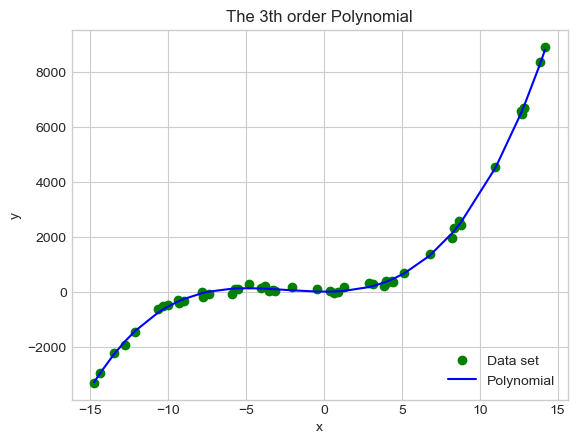

In [2]:
noise_scale = 100
number_of_samples = 50
x = 30*(np.random.rand(number_of_samples, 1) - 0.5)
y = 5 * x + 15 * x**2 + 2 * x**3 + noise_scale*np.random.randn(number_of_samples, 1) 

m = 3
scale = np.polyfit(x[:,0], y[:,0], deg=m)
poly = np.poly1d(scale)
# print(poly)
x_new = np.sort(x, axis = 0)
# print(x_new)
y_line = np.zeros(len(x_new))
for index in range(len(x_new)):
    y_line[index] = poly(x_new[index])
plt.plot(x,y,'go', label='Data set')
plt.plot(x_new, y_line, 'b',label='Polynomial')
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'The {m}th order Polynomial')
plt.legend(loc='lower right')

In [3]:
def fitness(gen):
    y_pred = gen[0] + gen[1]*x + gen[2]*x**2 + gen[3]*x**3
    return np.mean((y_pred - y)**2)

def mutate(gen):
    new_pop = []
    for i in range(9):
        mutated_gen = gen.copy()
        idx = np.random.randint(4)
        factor = np.random.uniform(0.0, 2.0)
        mutated_gen[idx] *= factor
        new_pop.append(mutated_gen)
    return new_pop       


def crossover(parent1, parent2):
    crossover_point = np.random.randint(1, len(parent1))
    child1 = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
    child2 = np.concatenate((parent2[:crossover_point], parent1[crossover_point:]))
    # to compute “gene averages”
    child = (child1 + child2)/2
    return child

Final gen: [ 0.33824806  0.0218946  14.98370828  2.02519044]
Final fitness: 8944.485864787672


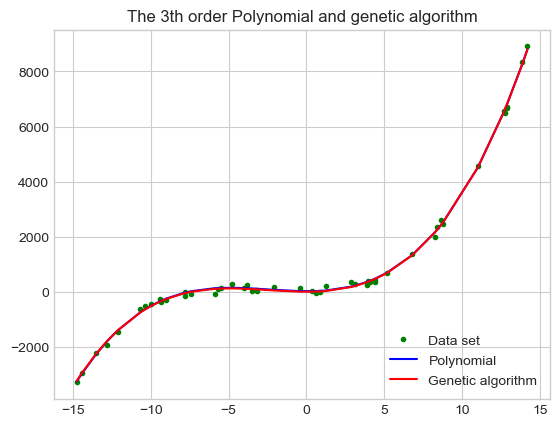

In [4]:
num_generations = 500
population = np.random.uniform(-10, 10, size = (100,4))
fitness_list = []
coef_list = []
for gen in range(num_generations):
    # Evaluate fitness
    fitness_values = np.array([fitness(individual) for individual in population])
    
    best_indices = np.argsort(fitness_values)[:10]
    best_arrays = population[best_indices]
    
    # Generate nine new arrays from each best array by crossover and mutate
    new_pop = []
    for arr in best_arrays:
        # Select parents
        parent_1 = np.copy(arr)
        index = np.random.choice(np.argsort(fitness_values)[10:])
        parent_2 = population[index]
        gen = crossover(parent_1, parent_2)
        new_gen = mutate(gen)
        for i in range(len(new_gen)):
            new_pop.append(new_gen[i])
    # to update the new population
    population = np.vstack((best_arrays, np.array(new_pop)))
    
# Compute final fitness for each individual in the final population
final_fitness = np.array([fitness(individual) for individual in population])

# Select the best array as the final answer
best_idx = np.argmin(final_fitness)
final_coef = population[best_idx]

print("Final gen:", final_coef)
print("Final fitness:", final_fitness[best_idx])

ga_y = final_coef[0] + final_coef[1]*x_new + final_coef[2]*x_new**2 + final_coef[3]*x_new**3
# Plot the following in one figure: 1)the original noisy data, 2)the polynomial you obtained in Homework #1, and  3)the polynomial obtained from a genetic algorithm
# 1) the original noisy data
plt.plot(x, y, 'g.', label='Data set')   
# 2) the polynomial you obtained in Homework #1
plt.plot(x_new, y_line, 'b', label='Polynomial')  
# 3) the polynomial obtained from a genetic algorithm
plt.plot(x_new, ga_y, 'r', label='Genetic algorithm')     
plt.title(f'The {m}th order Polynomial and genetic algorithm')
plt.legend(loc='lower right')


Based on the graph, we can observe that the line generated by the genetic algorithm after 500 iterations is very similar to the line generated by the polynomial in homework 1. But the genetic algorithm takes long time to run, while np.polyfit is faster and easier to implement in this dataset.